# Exercise #3:

1. Plot strip plots, histograms and boxplots of Annual Mean Temperature (temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit each type of graph in a single window (4 graphs per window - check how to do it in previous examples that are available in github).
You may change the settings in order to follow the best practices of data visualization (the ones I gave in the second lesson or other that you feel are also important).

2. Have a deeper look at the three types of plots and evaluate the pros and cons of each type as univariate visualizations.

3. I also challenge you to construct a plot that shows how the mean value of temp_ann varies with the size of random samplings of sites. Take random samples of 10, 50, 100, 150, 200, 250, 300, 500 and 1000, compute the mean Temp_ann for each sample and plot those means with a plot of your choice.

In [1]:
import pandas as pd
import zipfile
import seaborn as sns 
import matplotlib.pyplot as plt
import os

df = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

### 1.0 Find Top 4

In [2]:
# find the four catchments with the highest number of fish sampling sites
top4 = df.groupby(['Catchment_name'])['Site_code'].count().sort_values(ascending=False).head(4).index
print(top4)

Index(['Ebro', 'Galiza-Norte', 'Minho', 'Tejo'], dtype='object', name='Catchment_name')


### 1.1 Strip plots

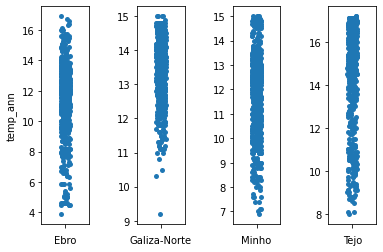

In [3]:
for i, cname in enumerate(top4):
    data = df[df['Catchment_name']== cname]
    plt.subplot(1,4,i+1)
    graph = sns.stripplot(data, y='temp_ann').set(xlabel=cname, ylabel='' )
    if i==0: plt.ylabel('temp_ann')
plt.subplots_adjust(wspace=1)
plt.show()

*For **easier optical comparison** either **fix the y-limit** in the subplots (1) or plot them all into the same graph (2):*

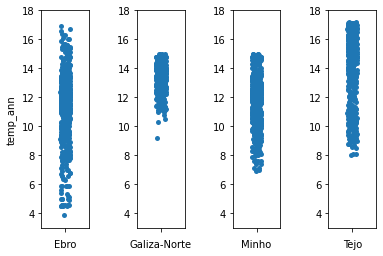

In [4]:
for i, cname in enumerate(top4):
    data = df[df['Catchment_name']== cname]
    plt.subplot(1,4,i+1)
    graph = sns.stripplot(data, y='temp_ann').set(xlabel=cname, ylabel='', ylim=(3, 18))
    if i==0: plt.ylabel('temp_ann')
plt.subplots_adjust(wspace=1)
plt.show()

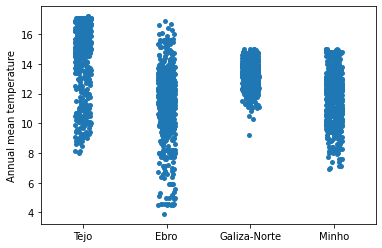

In [5]:
# or 4 plots in 1 graph
data = df[df['Catchment_name'].isin(top4)]
sns.stripplot(data, y='temp_ann', x='Catchment_name')
plt.ylabel('Annual mean temperature')
plt.xlabel('') 
plt.show()

### 1.2 Histograms

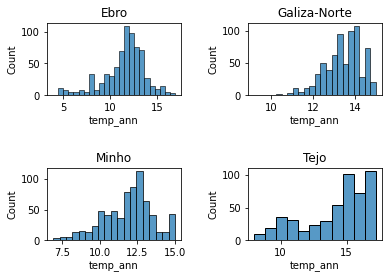

In [6]:
for i, cname in enumerate(top4):
    data = df[df['Catchment_name']== cname]
    plt.subplot(2,2,i+1)
    sns.histplot(data,x='temp_ann').set_title(cname)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

### 1.3 Boxplots

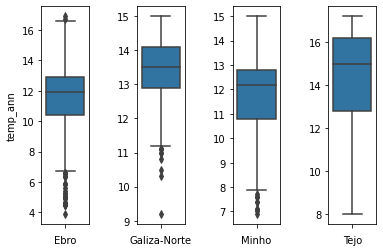

In [7]:
for i, cname in enumerate(top4):
    data = df[df['Catchment_name']== cname]
    plt.subplot(1,4,i+1)
    graph=sns.boxplot(data, y='temp_ann')
    graph.set(xlabel=cname, ylabel='')
    if i==0: graph.set(ylabel='temp_ann')
plt.subplots_adjust(wspace=1)
plt.show()

*For easier comparison, fix the x-axis limit:*

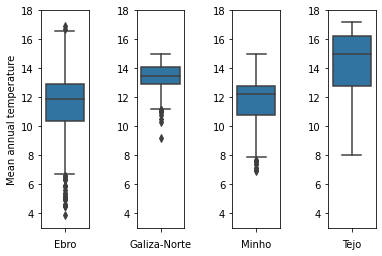

In [17]:
for i, cname in enumerate(top4):
    data = df[df['Catchment_name']== cname]
    plt.subplot(1,4,i+1)
    sns.boxplot(data, y='temp_ann').set(xlabel=cname, ylabel='',ylim=(3,18))
    if i==0: plt.ylabel('Mean annual temperature')
plt.subplots_adjust(wspace=1)
plt.show()

<AxesSubplot: xlabel='Catchment_name', ylabel='temp_ann'>

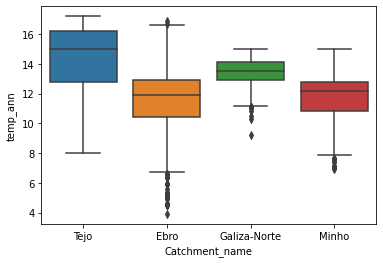

In [18]:
# or put all together in one single graph
sns.boxplot(data=df[df['Catchment_name'].isin(top4)], y='temp_ann', x='Catchment_name')

### 2. The Pros and Cons of each type of plot as univariate visualizations

|| Strip Plots...  |  Histograms...  | Box Plots (*Whisker Plots*)... |
|-|-|-|-|
|**Pro**  | ... are useful to display individual data points --> **good for small datasets** to **show all observations**  | ... give an estimate where values are concentrated, what the extremes are, whether there are any gaps / unusual values, and a rough view of the probability distribution. Especially useful when **wider variances** exist among the observed frequencies.   | ... are detailed, showing central value, spread and outliers --> Useful for **large numbers of observations** or to **compare several data sets**.| 
|**Contra** | ... of large datasets may have **points overlaying** each other and **lack detailed information** about distribution. | ... **can hide** some detailed but crucial **information** and **create bias**. (Depending on how data is grouped, they can look ragged and non-symmetrical and lead to false assumption of a skewed distribution.) | ... **emphasize the tails** of a distribution. They also **hide details** about distribution shape --> may **not** be suitable **for small datasets**.    |


### 3. Variation of mean_value of temp_ann with size of radom samplings of sites
Take random samples of 10, 50, 100, 150, 200, 250, 300, 500 and 1000, compute the mean Temp_ann for each sample and plot those means with a plot of your choice.

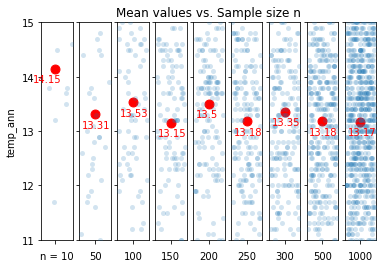

In [16]:
nsamples = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
meantemp = []

for i, n in enumerate(nsamples):
    dfsample = df.sample(n)
    meantemp.append(round(dfsample['temp_ann'].mean(),2))
# plot
    plt.subplot(1,len(nsamples),i+1)
    graph = sns.stripplot(data= dfsample, y='temp_ann', alpha=0.2)
    graph.set(xlabel=(nsamples[i]), yticks=[11,12,13,14,15], yticklabels=[], ylim=(11,15), ylabel='')
    plt.scatter(0, meantemp[i], marker='o', s=80, color='red')
# styling
    plt.annotate(str(meantemp[i]), xy=(0, meantemp[i]), xytext=(-0.09,meantemp[i]-0.25), color='red')
    if i == 0: graph.set(xlabel=f'n = {nsamples[i]}', ylabel='temp_ann', yticklabels=[11,12,13,14,15])
    if i == 4: plt.title('Mean values vs. Sample size n')
plt.show()